#FIND S


In [ ]:
import pandas as pd
import numpy as np

#to read the data in the csv file
data = pd.read_csv("Enjoysport.csv")
print(data,"n")

#making an array of all the attributes
d = np.array(data)[:,:-1]
print("n The attributes are: ",d)

#segragating the target that has positive and negative examples
target = np.array(data)[:,-1]
print("n The target is: ",target)

#training function to implement find-s algorithm
def train(c,t):
    for i, val in enumerate(t):
        if val == "Yes":
            specific_hypothesis = c[i].copy()
            break

    for i, val in enumerate(c):
        if t[i] == "Yes":
            for x in range(len(specific_hypothesis)):
                if val[x] != specific_hypothesis[x]:
                    specific_hypothesis[x] = '?'
                else:
                    pass

    return specific_hypothesis

#obtaining the final hypothesis
print("n The final hypothesis is:",train(d,target))

    Size Color     Shape Class
0    Big   Red    Circle    No
1  Small   Red  Triangle    No
2  Small   Red    Circle   Yes
3    Big  Blue    Circle    No
4  Small  Blue    Circle   Yes n
n The attributes are:  [['Big' 'Red' 'Circle']
 ['Small' 'Red' 'Triangle']
 ['Small' 'Red' 'Circle']
 ['Big' 'Blue' 'Circle']
 ['Small' 'Blue' 'Circle']]
n The target is:  ['No' 'No' 'Yes' 'No' 'Yes']
n The final hypothesis is: ['Small' '?' 'Circle']


#Linear Regression


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
USAhousing = pd.read_csv('USA_Housing.csv')


In [ ]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)

-2640159.7968526953


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df


,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [ ]:
predictions = lm.predict(X_test)

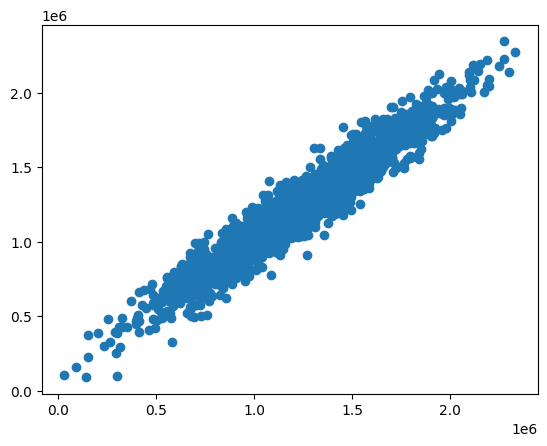

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914942
MSE: 10460958907.208977
RMSE: 102278.82922290897


#k-means clustering

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = [[0.34, -0.2, 1.13, 4.3], [5.1, -12.6, -7.0, 1.9], [-15.7, 0.06, -7.1, 11.2]]
centroids = {"centroid1":  [1.1, 0.2, -3.1, -0.4], "centroid2": [9.3, 6.1, -4.7, 0.18]}

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2)

In [ ]:
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
kmeans.cluster_centers_

array([[  2.72 ,  -6.4  ,  -2.935,   3.1  ],
       [-15.7  ,   0.06 ,  -7.1  ,  11.2  ]])

In [ ]:
kmeans.labels_

array([0, 0, 1], dtype=int32)

2)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
data = pd.read_csv('data4_19.csv',header=None)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
y_column = data.iloc[:, 4]

In [23]:
print(y_column)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: 4, Length: 150, dtype: object


In [24]:
X = data.drop(columns=[4])


In [25]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters=3)

In [28]:
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [29]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [30]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

#K Nearest Neigbours

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [99]:
header_names = ["feature1", "feature2", "feature3", "feature4", "target"]
df = pd.read_csv("data4_19.csv", names = header_names)
df.head()

,feature1,feature2,feature3,feature4,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [100]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()



In [101]:
df['target'] = label_encoder.fit_transform(df['target'])

In [104]:
y = df['target']

In [102]:
X = df[['feature1', 'feature2', 'feature3', 'feature4']]

In [103]:
X

,feature1,feature2,feature3,feature4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [83]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn = KNeighborsClassifier(n_neighbors=1)

In [108]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [109]:
pred = knn.predict(X_test)

In [110]:
from sklearn.metrics import classification_report,confusion_matrix

In [111]:
print(confusion_matrix(y_test,pred))

[[19  0  0]
 [ 0 26  0]
 [ 0  0 15]]


In [112]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        15

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [113]:
#do it for k means clustering
error_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

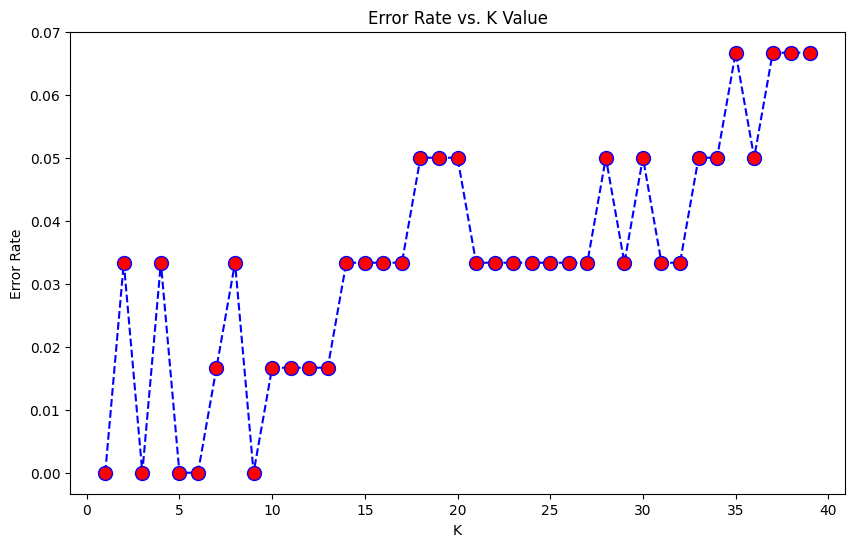

In [114]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#Multi-layer perceptron

In [119]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.rand(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.rand(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))


    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feedforward(self, inputs):
        # Hidden layer
        hidden_input = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        hidden_output = self.sigmoid(hidden_input)

        # Output layer
        output_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
        predicted_output = self.sigmoid(output_input)

        return hidden_output, predicted_output

    def train(self, inputs, targets, learning_rate, epochs):
        for epoch in range(epochs):
            # Forward pass
            hidden_output, predicted_output = self.feedforward(inputs)

            # Backpropagation
            output_error = targets - predicted_output
            output_delta = output_error * self.sigmoid_derivative(predicted_output)

            hidden_error = output_delta.dot(self.weights_hidden_output.T)
            hidden_delta = hidden_error * self.sigmoid_derivative(hidden_output)

            # Update weights and biases
            self.weights_hidden_output += hidden_output.T.dot(output_delta) * learning_rate
            self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
            self.weights_input_hidden += inputs.T.dot(hidden_delta) * learning_rate
            self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

            # Print the mean squared error for every 1000 epochs
            if epoch % 1000 == 0:
                mse = np.mean(np.square(targets - predicted_output))
                print(f"Epoch {epoch}, Mean Squared Error: {mse}")

# Example usage with XOR dataset
# The XOR dataset consists of inputs and corresponding outputs
# where the output is 1 only if exactly one of the inputs is 1.
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [1], [1], [0]])

# Initialize the neural network
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.1
epochs = 10000

# Create the neural network
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Train the neural network
nn.train(inputs, targets, learning_rate, epochs)

# Test the trained model
_, predictions = nn.feedforward(inputs)
print("\nFinal Predictions:")
print(predictions)


Epoch 0, Mean Squared Error: 0.3680079558789777
Epoch 1000, Mean Squared Error: 0.23958594816627438
Epoch 2000, Mean Squared Error: 0.18330418453463146
Epoch 3000, Mean Squared Error: 0.08350922364892721
Epoch 4000, Mean Squared Error: 0.025277957485190232
Epoch 5000, Mean Squared Error: 0.011889399593567837
Epoch 6000, Mean Squared Error: 0.007290349213723563
Epoch 7000, Mean Squared Error: 0.005121793256972718
Epoch 8000, Mean Squared Error: 0.0038956967563651837
Epoch 9000, Mean Squared Error: 0.0031190916188936564

Final Predictions:
[[0.05466895]
 [0.9518819 ]
 [0.95093343]
 [0.05137941]]


In [116]:
# Increase the number of nodes in the hidden layer
hidden_size = 8
nn = NeuralNetwork(input_size, hidden_size, output_size)
nn.train(inputs, targets, learning_rate, epochs)


Epoch 0, Mean Squared Error: 0.41698783638637515
Epoch 1000, Mean Squared Error: 0.24649582636713732
Epoch 2000, Mean Squared Error: 0.22054297236579526
Epoch 3000, Mean Squared Error: 0.1421467039994851
Epoch 4000, Mean Squared Error: 0.05087163624428111
Epoch 5000, Mean Squared Error: 0.019518317319774096
Epoch 6000, Mean Squared Error: 0.010470812174010143
Epoch 7000, Mean Squared Error: 0.006772737822312521
Epoch 8000, Mean Squared Error: 0.004872780490809079
Epoch 9000, Mean Squared Error: 0.0037477544426312917


In [118]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.rand(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.rand(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, x):
        return 1.0 - np.tanh(x)**2

    # Change the activation function
    def activation_function(self, x):
        return self.tanh(x)

    def activation_derivative(self, x):
        return self.tanh_derivative(x)

    def feedforward(self, inputs):
        # Hidden layer
        hidden_input = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        hidden_output = self.activation_function(hidden_input)

        # Output layer
        output_input = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
        predicted_output = self.activation_function(output_input)

        return hidden_output, predicted_output

# Example usage with the modified activation function
nn = NeuralNetwork(input_size, hidden_size, output_size)
nn.train(inputs, targets, learning_rate, epochs)


IndentationError: ignored

#decision tree

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [122]:
df = pd.read_csv('kyphosis.csv')

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
dtree = DecisionTreeClassifier()

In [128]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [129]:
predictions = dtree.predict(X_test)

In [130]:
from sklearn.metrics import classification_report,confusion_matrix

In [131]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.78      0.88      0.82        16
     present       0.71      0.56      0.63         9

    accuracy                           0.76        25
   macro avg       0.75      0.72      0.72        25
weighted avg       0.75      0.76      0.75        25



In [132]:
print(confusion_matrix(y_test,predictions))

[[14  2]
 [ 4  5]]


In [141]:
from IPython.display import Image
from six import StringIO
#from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

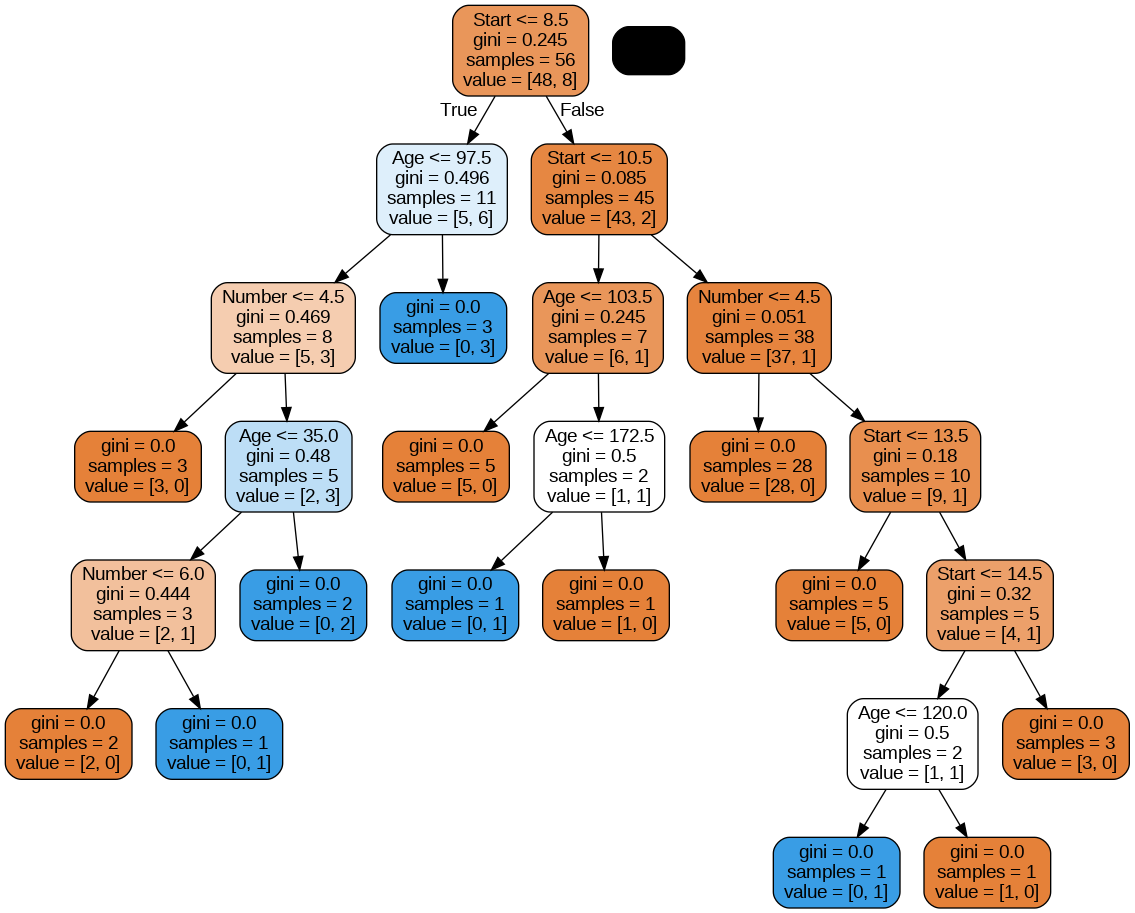

In [142]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')